In [1]:
import findspark
findspark.find()
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .master("local") \
    .appName("StockMarket") \
    .config("spark.executor.memory", "6gb") \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/08/21 10:25:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
df =spark.read.format('com.databricks.spark.csv')\
                    .options(header='true', inferschema='true')\
                    .load('AAPL.csv')

In [5]:
df.show()

+----------+--------+--------+--------+--------+---------+---------+
|      Date|    Open|    High|     Low|   Close|Adj Close|   Volume|
+----------+--------+--------+--------+--------+---------+---------+
|1999-12-31|3.604911|3.674107|3.553571|3.671875| 2.467498| 40952800|
|2000-01-03|3.745536|4.017857|3.631696|3.997768| 2.686497|133949200|
|2000-01-04|3.866071|3.950893|3.613839|3.660714| 2.459998|128094400|
|2000-01-05|3.705357|3.948661|3.678571|3.714286| 2.495997|194580400|
|2000-01-06|3.790179|3.821429|3.392857|3.392857| 2.279998|191993200|
|2000-01-07|3.446429|3.607143|3.410714|3.553571| 2.387998|115183600|
|2000-01-10|3.642857|3.651786|3.383929|3.491071| 2.345998|126266000|
|2000-01-11|3.426339|3.549107|3.232143|  3.3125| 2.225998|110387200|
|2000-01-12|3.392857|3.410714|3.089286|3.113839| 2.092498|244017200|
|2000-01-13|3.374439|3.526786|3.303571|3.455357| 2.321998|258171200|
|2000-01-14|3.571429|3.651786|3.549107|3.587054| 2.410497| 97594000|
|2000-01-18|3.607143|3.785714|3.58

In [6]:
import pyspark.sql.functions as f
df = df.withColumn('date', f.to_date('Date'))

In [7]:
df.show(n=5)

+----------+--------+--------+--------+--------+---------+---------+
|      date|    Open|    High|     Low|   Close|Adj Close|   Volume|
+----------+--------+--------+--------+--------+---------+---------+
|1999-12-31|3.604911|3.674107|3.553571|3.671875| 2.467498| 40952800|
|2000-01-03|3.745536|4.017857|3.631696|3.997768| 2.686497|133949200|
|2000-01-04|3.866071|3.950893|3.613839|3.660714| 2.459998|128094400|
|2000-01-05|3.705357|3.948661|3.678571|3.714286| 2.495997|194580400|
|2000-01-06|3.790179|3.821429|3.392857|3.392857| 2.279998|191993200|
+----------+--------+--------+--------+--------+---------+---------+
only showing top 5 rows



In [8]:
date_breakdown = ['year', 'month', 'day']
for i in enumerate(date_breakdown):
    index = i[0]
    name = i[1]
    df = df.withColumn(name, f.split('date', '-')[index])

df.show(n=10)

+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|      date|    Open|    High|     Low|   Close|Adj Close|   Volume|year|month|day|
+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|1999-12-31|3.604911|3.674107|3.553571|3.671875| 2.467498| 40952800|1999|   12| 31|
|2000-01-03|3.745536|4.017857|3.631696|3.997768| 2.686497|133949200|2000|   01| 03|
|2000-01-04|3.866071|3.950893|3.613839|3.660714| 2.459998|128094400|2000|   01| 04|
|2000-01-05|3.705357|3.948661|3.678571|3.714286| 2.495997|194580400|2000|   01| 05|
|2000-01-06|3.790179|3.821429|3.392857|3.392857| 2.279998|191993200|2000|   01| 06|
|2000-01-07|3.446429|3.607143|3.410714|3.553571| 2.387998|115183600|2000|   01| 07|
|2000-01-10|3.642857|3.651786|3.383929|3.491071| 2.345998|126266000|2000|   01| 10|
|2000-01-11|3.426339|3.549107|3.232143|  3.3125| 2.225998|110387200|2000|   01| 11|
|2000-01-12|3.392857|3.410714|3.089286|3.113839| 2.092498|244017200|2000|   

In [9]:
df_plot = df.select('year', 'Adj Close').toPandas()

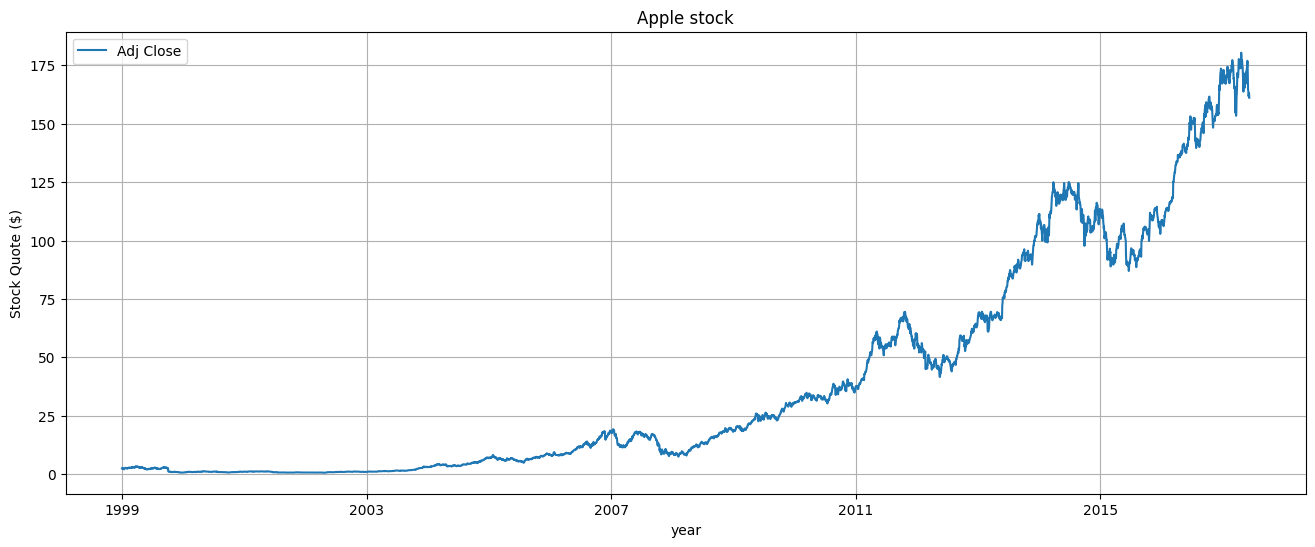

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
df_plot.set_index('year', inplace=True)
df_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple stock')
plt.ylabel('Stock Quote ($)')
plt.show()

In [11]:
df.toPandas().shape

(4610, 10)

In [12]:
df.dropna().count()

4610

In [13]:
df.select('Open', 'High', 'Low', 'Close', 'Adj Close').describe().show()

+-------+-----------------+------------------+------------------+------------------+-----------------+
|summary|             Open|              High|               Low|             Close|        Adj Close|
+-------+-----------------+------------------+------------------+------------------+-----------------+
|  count|             4610|              4610|              4610|              4610|             4610|
|   mean|46.28525130086777|46.717162366811266|45.819553227982546|46.277442902819914|39.77304221626904|
| stddev|49.17699648166954| 49.55366398613007| 48.78861283288266|   49.176513212795|47.59403758365483|
|    min|         0.927857|          0.942143|          0.908571|          0.937143|         0.629759|
|    max|       182.589996|             183.5|        180.210007|        181.720001|       180.389313|
+-------+-----------------+------------------+------------------+------------------+-----------------+



In [14]:
df.groupBy(['year']).agg({'Adj Close':'count'})\
    .withColumnRenamed('count(Adj Close)', 'Row Count')\
    .orderBy(["year"],ascending=False)\
    .show()

+----+---------+
|year|Row Count|
+----+---------+
|2018|       81|
|2017|      251|
|2016|      252|
|2015|      252|
|2014|      252|
|2013|      252|
|2012|      250|
|2011|      252|
|2010|      252|
|2009|      252|
|2008|      253|
|2007|      251|
|2006|      251|
|2005|      252|
|2004|      252|
|2003|      252|
|2002|      252|
|2001|      248|
|2000|      252|
|1999|        1|
+----+---------+



In [15]:
trainDF = df[df.year < 2017]
testDF = df[df.year > 2016]

In [16]:
trainDF.toPandas().shape

(4278, 10)

In [17]:
testDF.toPandas().shape

(332, 10)

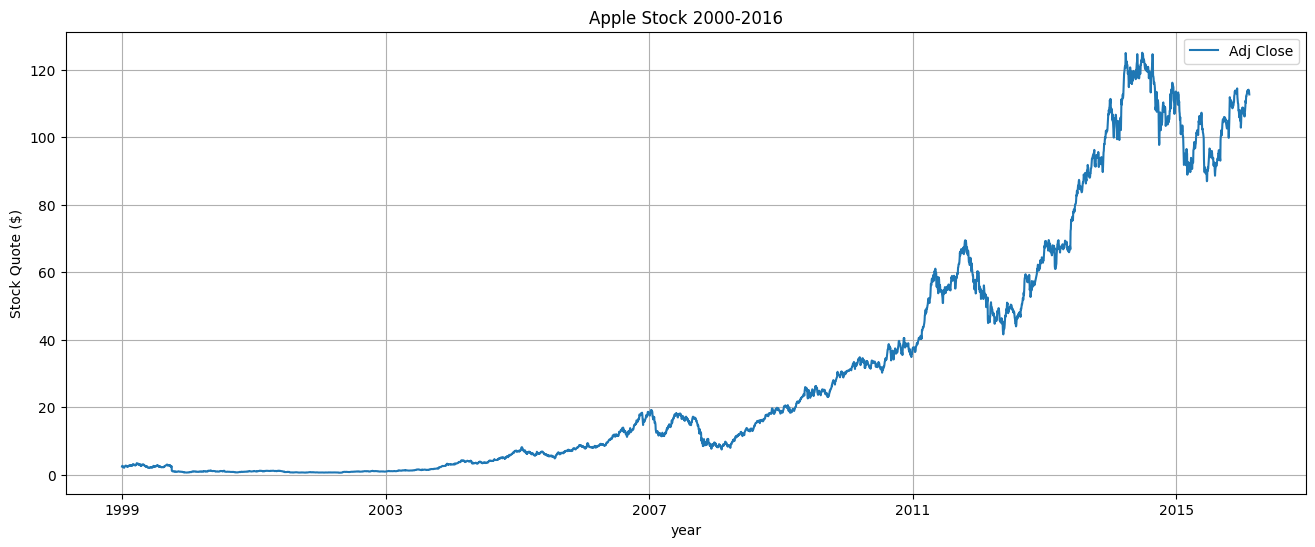

In [18]:
trainDF_plot = trainDF.select('year', 'Adj Close').toPandas()
trainDF_plot.set_index('year', inplace=True)
trainDF_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2000-2016')
plt.ylabel('Stock Quote ($)')
plt.show()

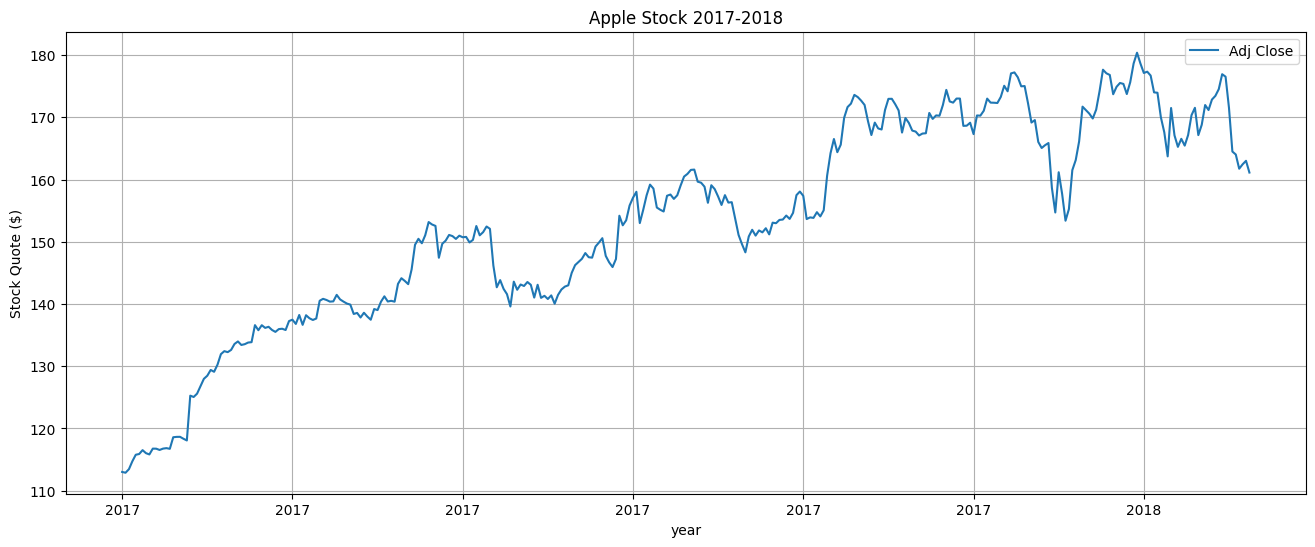

In [19]:
testDF_plot = testDF.select('year', 'Adj Close').toPandas()
testDF_plot.set_index('year', inplace=True)
testDF_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2017-2018')
plt.ylabel('Stock Quote ($)')
plt.show()

In [20]:
import numpy as np
trainArray=np.array(trainDF.select('Open','High','Low','Close','Volume','Adj Close').collect())
testArray=np.array(testDF.select('Open','High','Low','Close','Volume','Adj Close').collect())

In [21]:
print(trainArray[0])
print('---------------')
print(testArray[0])

[3.604911e+00 3.674107e+00 3.553571e+00 3.671875e+00 4.095280e+07
 2.467498e+00]
---------------
[1.15800003e+02 1.16330002e+02 1.14760002e+02 1.16150002e+02
 2.87819000e+07 1.13013916e+02]


In [22]:
from sklearn.preprocessing import MinMaxScaler
minMaxScale = MinMaxScaler()

In [23]:
minMaxScale.fit(trainArray)

MinMaxScaler()

In [24]:
testingArray = minMaxScale.transform(testArray)
trainingArray = minMaxScale.transform(trainArray)

In [25]:
print(testingArray[0])
print('---------------')
print(trainingArray[0])

[0.86025834 0.86369548 0.8724821  0.87240926 0.01026612 0.90325671]
---------------
[0.02004801 0.02044916 0.02026953 0.02070781 0.01686076 0.01477032]


In [26]:
xtrain = trainingArray[:, 0:-1]
xtest = testingArray[:, 0:-1]
ytrain = trainingArray[:, -1:]
ytest = testingArray[:, -1:]

In [27]:
trainingArray[0]

array([0.02004801, 0.02044916, 0.02026953, 0.02070781, 0.01686076,
       0.01477032])

In [28]:
xtrain[0]

array([0.02004801, 0.02044916, 0.02026953, 0.02070781, 0.01686076])

In [29]:
ytrain[0]

array([0.01477032])

In [30]:
print('xtrain shape = {}'.format(xtrain.shape))
print('xtest shape = {}'.format(xtest.shape))
print('ytrain shape = {}'.format(ytrain.shape))
print('ytest shape = {}'.format(ytest.shape))

xtrain shape = (4278, 5)
xtest shape = (332, 5)
ytrain shape = (4278, 1)
ytest shape = (332, 1)


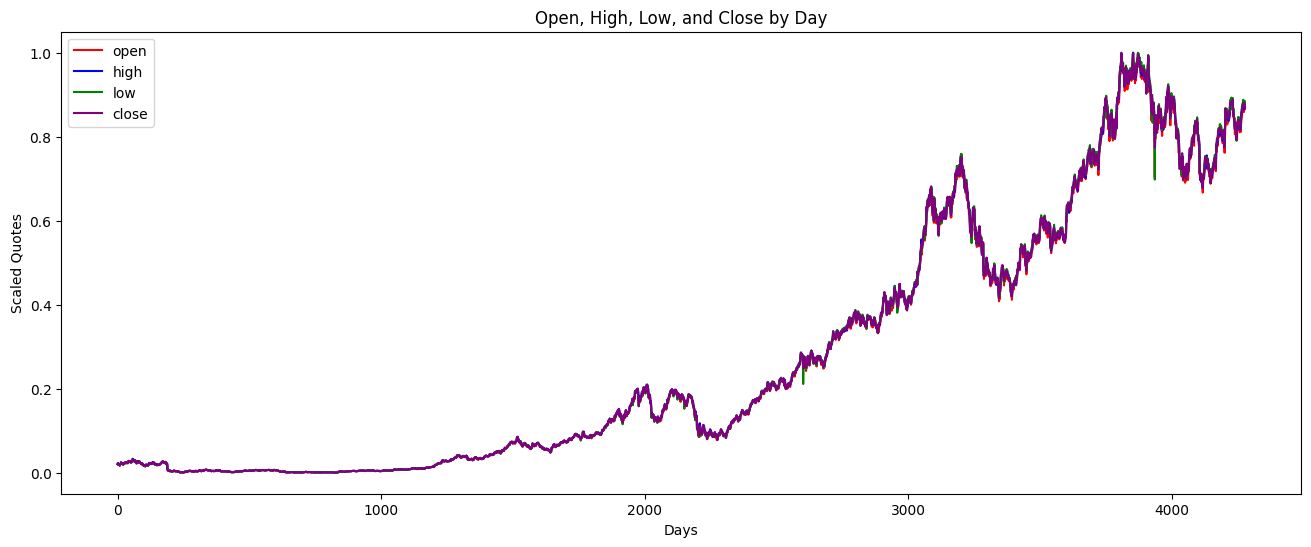

In [31]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,0],color='red', label='open')
plt.plot(xtrain[:,1],color='blue', label='high')
plt.plot(xtrain[:,2],color='green', label='low')
plt.plot(xtrain[:,3],color='purple', label='close')
plt.legend(loc = 'upper left')
plt.title('Open, High, Low, and Close by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

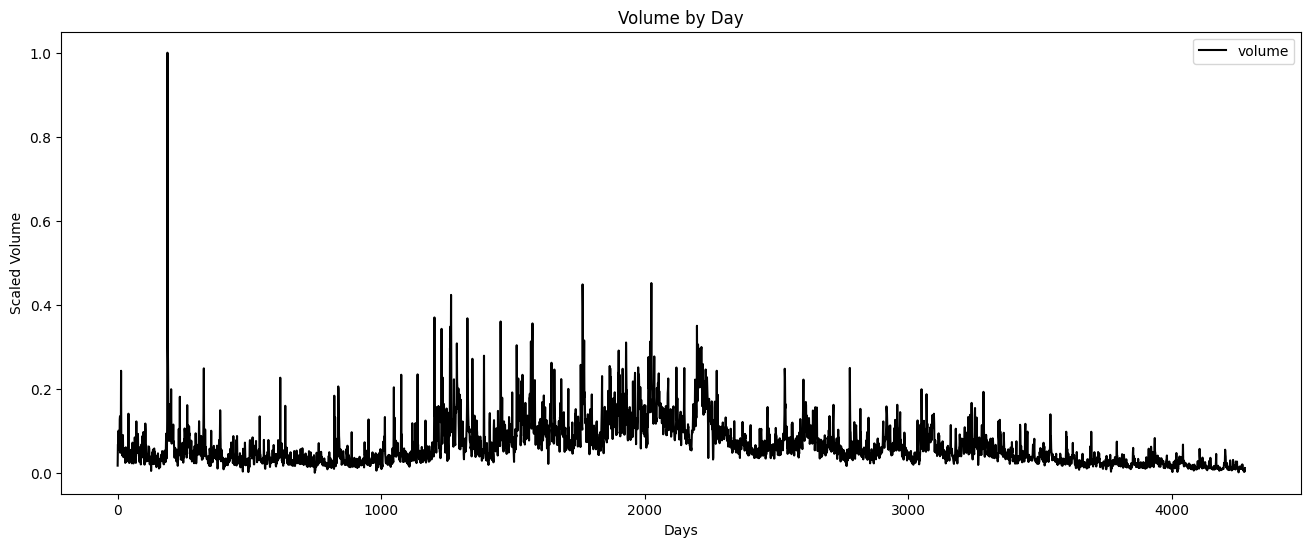

In [32]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,4],color='black', label='volume')
plt.legend(loc = 'upper right')
plt.title('Volume by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Volume')
plt.show()

In [33]:
from keras import models, layers

2022-08-21 10:25:37.171376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 10:25:37.171429: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [34]:
model = models.Sequential()
model.add(layers.LSTM(1, input_shape=(1,5)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2022-08-21 10:25:38.797537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-21 10:25:38.797574: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-21 10:25:38.797593: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-95-223): /proc/driver/nvidia/version does not exist
2022-08-21 10:25:38.797843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
xtrain = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
xtest = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))

In [36]:
print('The shape of xtrain is {}: '.format(xtrain.shape))
print('The shape of xtest is {}: '.format(xtest.shape))

The shape of xtrain is (4278, 1, 5): 
The shape of xtest is (332, 1, 5): 


In [37]:
loss = model.fit(xtrain, ytrain, batch_size=10, epochs=10)

Epoch 1/10
428/428 [==============================] - 3s 2ms/step - loss: 0.0517
Epoch 2/10
428/428 [==============================] - 1s 3ms/step - loss: 0.0042
Epoch 3/10
428/428 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 4/10
428/428 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 5/10
428/428 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 6/10
428/428 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 7/10
428/428 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 8/10
428/428 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 9/10
428/428 [==============================] - 1s 2ms/step - loss: 9.9667e-04
Epoch 10/10
428/428 [==============================] - 1s 2ms/step - loss: 9.6873e-04


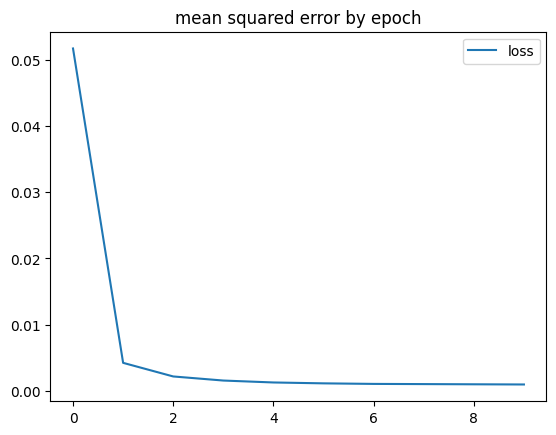

In [38]:
plt.plot(loss.history['loss'], label = 'loss')
plt.title('mean squared error by epoch')
plt.legend()
plt.show()

In [39]:
predicted = model.predict(xtest)

11/11 [==============================] - 0s 2ms/step


In [40]:
combined_array = np.concatenate((ytest, predicted), axis = 1)

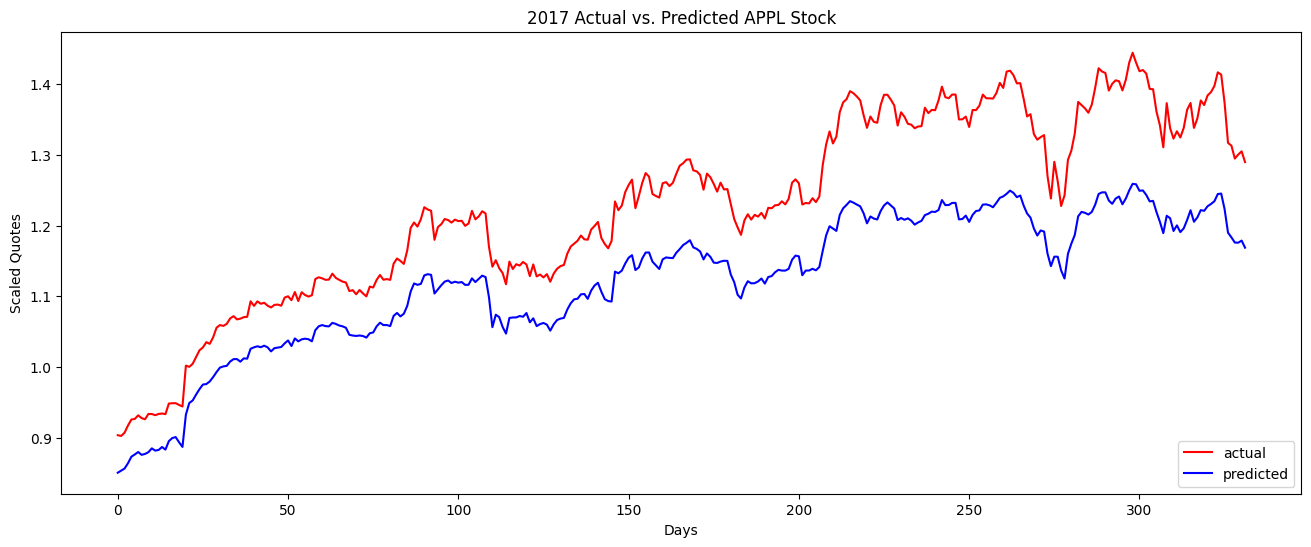

In [41]:
plt.figure(figsize=(16,6))
plt.plot(combined_array[:,0],color='red', label='actual')
plt.plot(combined_array[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('2017 Actual vs. Predicted APPL Stock')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

In [42]:
import sklearn.metrics as metrics
np.sqrt(metrics.mean_squared_error(ytest,predicted))

0.11062330978701759

In [43]:
spark.stop()